In [1]:
#This script prepared data from the annotations to be ready to use for yolo
#this includes converting the annotations to individual files
#and copy paste the images in the train and val folders for both images and labels

In [2]:
import pandas as pd
from imutils import paths
import cv2
import json
import os
import shutil
import matplotlib.pyplot as plt
#from imutils import pathsc
import random

In [3]:
class_categories = ["pecking", "shade", "blue"]

In [4]:
#load annotations and add column
df_annotations= pd.read_csv('/media/andre/T5 EVO/Foraging HD/Isolated_frames/revised_3425.csv')
df_annotations

,#filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,20240805_1_00035_0001.jpg,151459,{},1,0,"{""name"":""rect"",""x"":1307,""y"":303,""width"":85,""he...","{""pecking"":""n"",""shade"":""y"",""blue"":""n""}"
1,20240805_1_00035_0002.jpg,119974,{},1,0,"{""name"":""rect"",""x"":977,""y"":471,""width"":183,""he...","{""pecking"":""n"",""shade"":""y"",""blue"":""n""}"
2,20240805_1_00035_0003.jpg,282821,{},1,0,"{""name"":""rect"",""x"":799,""y"":537,""width"":93,""hei...","{""pecking"":""n"",""shade"":""y"",""blue"":""n""}"
3,20240805_1_00035_0005.jpg,218754,{},2,0,"{""name"":""rect"",""x"":936,""y"":514,""width"":90,""hei...","{""pecking"":""n"",""shade"":""y"",""blue"":""n""}"
4,20240805_1_00035_0005.jpg,218754,{},2,1,"{""name"":""rect"",""x"":1424,""y"":431,""width"":79,""he...","{""pecking"":""n"",""shade"":""y"",""blue"":""n""}"
...,...,...,...,...,...,...,...
4076,20241227_5_01447_0052.jpg,95837,{},1,0,"{""name"":""rect"",""x"":919,""y"":604,""width"":108,""he...","{""pecking"":""n"",""shade"":""n"",""blue"":""y""}"
4077,20241227_5_01447_0056.jpg,84365,{},1,0,"{""name"":""rect"",""x"":1298,""y"":372,""width"":86,""he...","{""pecking"":""y"",""shade"":""n"",""blue"":""y""}"
4078,20241227_5_01447_0060.jpg,92263,{},1,0,"{""name"":""rect"",""x"":1084,""y"":514,""width"":75,""he...","{""pecking"":""y"",""shade"":""n"",""blue"":""y""}"
4079,20241227_5_01447_0062.jpg,88749,{},1,0,"{""name"":""rect"",""x"":942,""y"":584,""width"":83,""hei...","{""pecking"":""y"",""shade"":""n"",""blue"":""y""}"


In [5]:
#select only annotated images i.e. the ones with something written the region shape
df_annotations=df_annotations[df_annotations['region_shape_attributes'].str.len()> 10]
df_annotations


,#filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,20240805_1_00035_0001.jpg,151459,{},1,0,"{""name"":""rect"",""x"":1307,""y"":303,""width"":85,""he...","{""pecking"":""n"",""shade"":""y"",""blue"":""n""}"
1,20240805_1_00035_0002.jpg,119974,{},1,0,"{""name"":""rect"",""x"":977,""y"":471,""width"":183,""he...","{""pecking"":""n"",""shade"":""y"",""blue"":""n""}"
2,20240805_1_00035_0003.jpg,282821,{},1,0,"{""name"":""rect"",""x"":799,""y"":537,""width"":93,""hei...","{""pecking"":""n"",""shade"":""y"",""blue"":""n""}"
3,20240805_1_00035_0005.jpg,218754,{},2,0,"{""name"":""rect"",""x"":936,""y"":514,""width"":90,""hei...","{""pecking"":""n"",""shade"":""y"",""blue"":""n""}"
4,20240805_1_00035_0005.jpg,218754,{},2,1,"{""name"":""rect"",""x"":1424,""y"":431,""width"":79,""he...","{""pecking"":""n"",""shade"":""y"",""blue"":""n""}"
...,...,...,...,...,...,...,...
4076,20241227_5_01447_0052.jpg,95837,{},1,0,"{""name"":""rect"",""x"":919,""y"":604,""width"":108,""he...","{""pecking"":""n"",""shade"":""n"",""blue"":""y""}"
4077,20241227_5_01447_0056.jpg,84365,{},1,0,"{""name"":""rect"",""x"":1298,""y"":372,""width"":86,""he...","{""pecking"":""y"",""shade"":""n"",""blue"":""y""}"
4078,20241227_5_01447_0060.jpg,92263,{},1,0,"{""name"":""rect"",""x"":1084,""y"":514,""width"":75,""he...","{""pecking"":""y"",""shade"":""n"",""blue"":""y""}"
4079,20241227_5_01447_0062.jpg,88749,{},1,0,"{""name"":""rect"",""x"":942,""y"":584,""width"":83,""hei...","{""pecking"":""y"",""shade"":""n"",""blue"":""y""}"


In [6]:
#check that there are no wierd values on the annotations
print("Number of characters")
print(list(set(df_annotations['region_shape_attributes'].str.len().tolist())))

Number of characters
[52, 53, 54, 55, 56, 57]


In [7]:
print(df_annotations[df_annotations['region_shape_attributes'].str.len()==52]["region_shape_attributes"].iloc[0])
print(df_annotations[df_annotations['region_shape_attributes'].str.len()==53]["region_shape_attributes"].iloc[0])
print(df_annotations[df_annotations['region_shape_attributes'].str.len()==54]["region_shape_attributes"].iloc[0])
print(df_annotations[df_annotations['region_shape_attributes'].str.len()==55]["region_shape_attributes"].iloc[0])
print(df_annotations[df_annotations['region_shape_attributes'].str.len()==56]["region_shape_attributes"].iloc[0])
print(df_annotations[df_annotations['region_shape_attributes'].str.len()==57]["region_shape_attributes"].iloc[0])
#seems all ok

{"name":"rect","x":724,"y":2,"width":63,"height":63}
{"name":"rect","x":84,"y":631,"width":73,"height":88}
{"name":"rect","x":475,"y":651,"width":60,"height":87}
{"name":"rect","x":1307,"y":303,"width":85,"height":73}
{"name":"rect","x":977,"y":471,"width":183,"height":162}
{"name":"rect","x":1011,"y":389,"width":163,"height":175}


In [8]:
#yolo needs images and labels on different folders and labels on different files for each
#first select 10% pictures for validation
import json
print("images:")
annotations_list=df_annotations["region_attributes"].tolist()
# Initialize empty lists
pecking, shade, blue = [], [], []
#Process each JSON string
for item in annotations_list:
    parsed = json.loads(item)  # Convert string to dictionary
    
    #Append values, using default 'None' if key is missing
    pecking.append(parsed.get("pecking", None))
    shade.append(parsed.get("shade", None))
    blue.append(parsed.get("blue", None))


images:


In [9]:
df_annotations["pecking"]=pecking
df_annotations["shade"]=shade
df_annotations["blue"]=blue

/tmp/ipykernel_12225/3331749413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annotations["pecking"]=pecking
/tmp/ipykernel_12225/3331749413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annotations["shade"]=shade
/tmp/ipykernel_12225/3331749413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [10]:
df_annotations

,#filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,pecking,shade,blue
0,20240805_1_00035_0001.jpg,151459,{},1,0,"{""name"":""rect"",""x"":1307,""y"":303,""width"":85,""he...","{""pecking"":""n"",""shade"":""y"",""blue"":""n""}",n,y,n
1,20240805_1_00035_0002.jpg,119974,{},1,0,"{""name"":""rect"",""x"":977,""y"":471,""width"":183,""he...","{""pecking"":""n"",""shade"":""y"",""blue"":""n""}",n,y,n
2,20240805_1_00035_0003.jpg,282821,{},1,0,"{""name"":""rect"",""x"":799,""y"":537,""width"":93,""hei...","{""pecking"":""n"",""shade"":""y"",""blue"":""n""}",n,y,n
3,20240805_1_00035_0005.jpg,218754,{},2,0,"{""name"":""rect"",""x"":936,""y"":514,""width"":90,""hei...","{""pecking"":""n"",""shade"":""y"",""blue"":""n""}",n,y,n
4,20240805_1_00035_0005.jpg,218754,{},2,1,"{""name"":""rect"",""x"":1424,""y"":431,""width"":79,""he...","{""pecking"":""n"",""shade"":""y"",""blue"":""n""}",n,y,n
...,...,...,...,...,...,...,...,...,...,...
4076,20241227_5_01447_0052.jpg,95837,{},1,0,"{""name"":""rect"",""x"":919,""y"":604,""width"":108,""he...","{""pecking"":""n"",""shade"":""n"",""blue"":""y""}",n,n,y
4077,20241227_5_01447_0056.jpg,84365,{},1,0,"{""name"":""rect"",""x"":1298,""y"":372,""width"":86,""he...","{""pecking"":""y"",""shade"":""n"",""blue"":""y""}",y,n,y
4078,20241227_5_01447_0060.jpg,92263,{},1,0,"{""name"":""rect"",""x"":1084,""y"":514,""width"":75,""he...","{""pecking"":""y"",""shade"":""n"",""blue"":""y""}",y,n,y
4079,20241227_5_01447_0062.jpg,88749,{},1,0,"{""name"":""rect"",""x"":942,""y"":584,""width"":83,""hei...","{""pecking"":""y"",""shade"":""n"",""blue"":""y""}",y,n,y


In [11]:
#10% of the images
sample_size=int(len(df_annotations)*0.05) # why does it sample size 5%
annotations_validation=pd.concat([df_annotations[df_annotations["pecking"]=="y"].sample(n=sample_size),df_annotations[df_annotations["pecking"]=="n"].sample(n=sample_size)])
len(annotations_validation)

406

In [12]:
#the remaning for training
annotations_training=df_annotations[~df_annotations["#filename"].isin(annotations_validation["#filename"])]
len(annotations_training)

3539

In [13]:
print("training images:")
print(len(annotations_training))
print("validation images:")
print(len(annotations_validation))

training images:
3539
validation images:
406


In [14]:
#convert to yolo format for bounding boxes
#<class_id> <x_center> <y_center> <width> <height> normalized


In [15]:
#directories of the images and to where to export
original_images_dir="/media/andre/T5 EVO/Foraging HD/Isolated_frames/annotated_frames"
background_images_dir="/media/andre/T5 EVO/Foraging HD/Isolated_frames/background_frames"
export_dir="/media/andre/T5 EVO/Foraging HD/YOLO_model_input/04_Birds_background"

os.makedirs(os.path.join(export_dir + "/labels/val"), exist_ok=True)
os.makedirs(os.path.join(export_dir + "/images/val"), exist_ok=True)
os.makedirs(os.path.join(export_dir + "/labels/train"), exist_ok=True)
os.makedirs(os.path.join(export_dir + "/images/train"), exist_ok=True)

In [16]:
for i in range(0,400): # cutoff at 400?
    if len(annotations_validation[annotations_validation["#filename"]==annotations_validation["#filename"].iloc[i]])<1:
        break
print(i)
annotations_validation[annotations_validation["#filename"]==annotations_validation["#filename"].iloc[i]]

399


,#filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,pecking,shade,blue
2445,20240903_4_00200_0007.jpg,102902,{},1,0,"{""name"":""rect"",""x"":353,""y"":313,""width"":167,""he...","{""pecking"":""n"",""shade"":""n"",""blue"":""y""}",n,n,y


In [17]:
#list all images uniquely as one image can have multiple bounding boxes
images_validation=list(set(annotations_validation["#filename"]))
images_training = list(set(annotations_training["#filename"]))


In [18]:
def class_label(annotation_row: pd.DataFrame, number_of_classes: int):
    class_ids = list(range(number_of_classes))
    if annotation_row["pecking"] == "n":
        return class_ids[0]
    elif annotation_row["pecking"] == "y":
        return class_ids[1]
    else: return class_ids[0] # because all that are not labeled is pecking n
    
    

In [19]:
def save_as_yolo(val_or_train:str, images:list, annotations:pd.DataFrame, images_dir:str, export_dir:str):
    if val_or_train != "val" and val_or_train != "train":
        print("Check parameter: val_or_train")
        return False

    #loop through all rows for validation
    for i in range(0,len(images)):
        #load image to get the dimensons for the normalization
        image_path=images_dir+"/"+images[i]
        image = cv2.imread(image_path)
        img_height, img_width, _ = image.shape
    
        annotations_i=annotations[annotations["#filename"]==images[i]]
        for row in range(0,len(annotations_i)):
            #get the bounding boxes
            bbox_data = json.loads(annotations_i['region_shape_attributes'].iloc[row])
            
            if bbox_data["name"] == "rect":
                class_id = 0 #class_label(annotations_i.iloc[row], len(class_categories))
                x, y, width, height = bbox_data["x"], bbox_data["y"], bbox_data["width"], bbox_data["height"]
                
                x_center = (x + width / 2) / img_width
                y_center = (y + height / 2) / img_height
                width_norm = width / img_width
                height_norm = height / img_height

            
        
                #save the label
                label_filename = os.path.splitext(annotations_i['#filename'].iloc[row])[0] + ".txt"
                label_path = os.path.join(export_dir + f"/labels/{val_or_train}/", label_filename)
    
                with open(label_path, "a") as f:
                    f.write(f"{class_id} {x_center} {y_center} {width_norm} {height_norm}\n")
            #copy the respective image
            shutil.copyfile(image_path,label_path.replace("labels","images").replace("txt","jpg"))


In [20]:
save_as_yolo("val", images_validation, annotations_validation, original_images_dir, export_dir)

In [21]:
save_as_yolo("train", images_training, annotations_training, original_images_dir, export_dir)

In [22]:
# add blank .txt files for background frames
background_images = [f for f in os.listdir(background_images_dir) if f.endswith(".jpg") and not f.startswith(".")]
sample_size = int(len(background_images)*0.1)
background_images_val = random.sample(background_images, sample_size)
background_images_training = list(set(background_images)-set(background_images_val))

for val_image in background_images_val:
    label_path = os.path.join(export_dir + f"/labels/val/", val_image.replace("jpg","txt"))
    open(label_path,"a").close()
    shutil.copy(os.path.join(background_images_dir, val_image), label_path.replace("labels","images").replace("txt","jpg"))

for training_image in background_images_training:
    label_path = os.path.join(export_dir + f"/labels/train/", val_image.replace("jpg","txt"))
    open(label_path,"a").close()
    shutil.copy(os.path.join(background_images_dir, val_image), label_path.replace("labels","images").replace("txt","jpg"))
    


                              





In [67]:
annotations_validation_i
x

NameError: name 'annotations_validation_i' is not defined

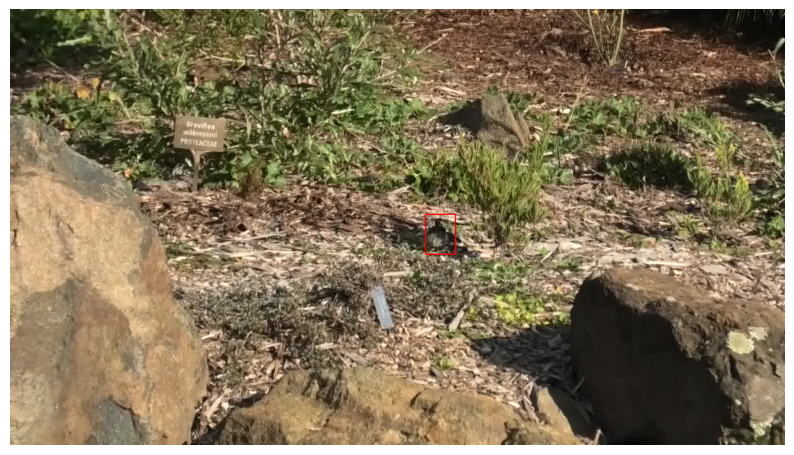

In [59]:
#random display some images
#select copied images
images_to_display=list(paths.list_images(export_dir + "/images/train/"))
i=random.randint(0, len(images_to_display))
image_path=images_to_display[i]
label_path=images_to_display[i].replace("images","labels").replace(".jpg",".txt")
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_height, img_width, _ = image.shape
# Read bounding box data from the label file
with open(label_path, "r") as f:
    for line in f.readlines():
        data = line.strip().split()
        if len(data) != 5:
            continue
        
        _, x_center, y_center, width_norm, height_norm = map(float, data)
        
        x = int((x_center - width_norm / 2) * img_width)
        y = int((y_center - height_norm / 2) * img_height)
        width = int(width_norm * img_width)
        height = int(height_norm * img_height)
        
        # Draw the bounding box on the image
        image = cv2.rectangle(image, (x, y), (x + width, y + height), (255, 0, 0), 2)
    # Display the image with bounding boxes using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.show()


In [ ]:
#now the same but for the training dataset


In [68]:
# #loop through all rows for validation
# #CHANGE antenna_annotations_validation to antenna_annotations_training
# #CHANGE val to train
# #CAREFUL WITH COPY PASTE!!!!
# images=list(set(annotations_training["#filename"]))

# for i in range(0,len(images)):######CHANGE HERE
#     image_path=orginal_images_dir+"/"+images[i]
#     image = cv2.imread(image_path)
#     img_height, img_width, _ = image.shape

#     annotations_training_i=annotations_training[annotations_training["#filename"]==images[i]]
#     for row in range(0,len(annotations_training_i)):
#         #get the bounding boxes
#         bbox_data = json.loads(annotations_training_i['region_shape_attributes'].iloc[row])
        
#         if bbox_data["name"] == "rect":
#             x, y, width, height = bbox_data["x"], bbox_data["y"], bbox_data["width"], bbox_data["height"]
            
#             x_center = (x + width / 2) / img_width
#             y_center = (y + height / 2) / img_height
#             width_norm = width / img_width
#             height_norm = height / img_height
    
#             #save the label
#             label_filename = os.path.splitext(annotations_training_i['#filename'].iloc[row])[0] + ".txt"
#             label_path = os.path.join(export_dir+"/labels/train/", label_filename)
            
#             with open(label_path, "a") as f:
#                 f.write(f"0 {x_center} {y_center} {width_norm} {height_norm}\n")
#         #copy the respective image
#         shutil.copyfile(image_path,label_path.replace("labels","images").replace("txt","jpg"))


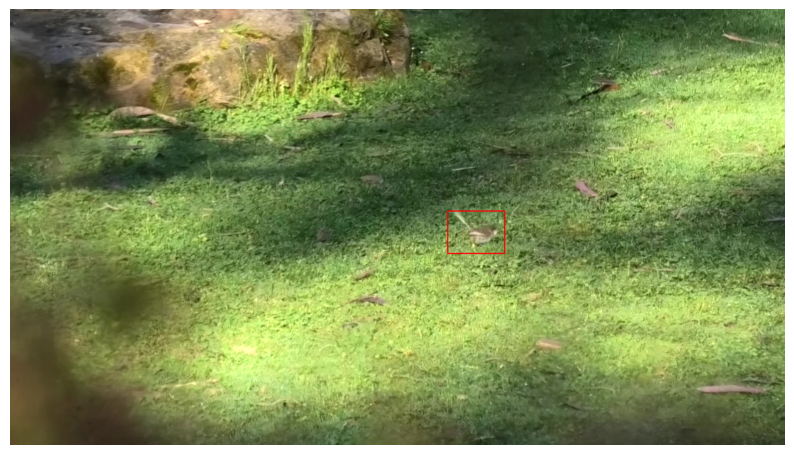

In [25]:
# #dispolay images
# images_to_display=list(paths.list_images(export_dir + "/images/val"))
# i=random.randint(0, len(images_to_display))
# image_path=images_to_display[i]
# label_path=images_to_display[i].replace("images","labels").replace(".jpg",".txt")
# image = cv2.imread(image_path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# img_height, img_width, _ = image.shape
# # Read bounding box data from the label file
# with open(label_path, "r") as f:
#     for line in f.readlines():
#         data = line.strip().split()
#         if len(data) != 5:
#             continue
        
#         _, x_center, y_center, width_norm, height_norm = map(float, data)
        
#         x = int((x_center - width_norm / 2) * img_width)
#         y = int((y_center - height_norm / 2) * img_height)
#         width = int(width_norm * img_width)
#         height = int(height_norm * img_height)
        
#         # Draw the bounding box on the image
#         image = cv2.rectangle(image, (x, y), (x + width, y + height), (255, 0, 0), 2)
#     # Display the image with bounding boxes using Matplotlib
#     plt.figure(figsize=(10, 6))
#     plt.imshow(image)
#     plt.axis("off")
#     plt.show()

In [ ]:
#AT the end
#need to create a .yaml file in the same root folder as the train and val data with the following structure
#train: /home/andre/Desktop/Fairy/Training_data/images/train
#val: /home/andre/Desktop/Fairy/Training_data//images/val

#nc: 1  # Number of classes
#names: ["pecking"]
